## Fourier Series

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math

#### The Square Function
Create a python function for the square function shown below.
This function has a period of $2\pi$ and alternates between $0$ and $1$.

<img width=600px src="SquareFunction.png">

In [10]:
def squareFunction(x):
    ### TO DO: Create a square function
    n = x % (2*math.pi)
    if(n < math.pi):
        return 1
    elif(n>math.pi):
        return -1

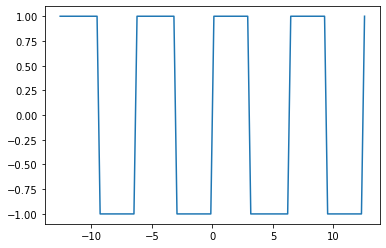

In [11]:
### TO DO: Plot the square function from (-4pi, 4pi)
xx=(np.linspace(-4*math.pi, 4*math.pi, 100))
yy=np.zeros(xx.size)
a=0
while a < xx.size:
    yy[a] = squareFunction(xx[a])
    a=a+1


plt.plot(xx,yy)

Visually, verify your plot matches the graph in the image above.

#### The Sine Series
Create a function that returns the sum of the first $k$ elements of the fourier sine series. 

In [53]:
def fourierSineSeries(k, bk, x):
    """
    Returns the sum of the first k elements of the fourier sine series
    Parameters:
        k: the number of elements to summate
        bk: the coefficients of each element
        x: the x value to evaluate
    Returns:
        The S(x) approximation using the fourier sine series
    """
    ### TO DO: Create the fourier sine series sum
    #function=bk*sin(kx)
    sum=0
    for i in range(k):
        sum=sum+bk[i]*math.sin(i*x)
    return sum

#### Find the $b_k$ terms 
Using your square function and fourier sine series, find and plot the first 5, 10, and 100 $b_k$ terms for your square function. 

In order to find this coefficients, you'll have to use some integral function. I recommend using `quad` defined here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

Recall the integral to find the $b_k$ coefficients is defined as:

$$b_k = \frac{2}{\pi} \int \limits^{\pi}_{0} S(x)sin(kx) dx $$

The quad function, and other pre-made integral functions take a function $f$ as a argument. In order to be able to give these integration functions a single function name, you may have to define an `integrand` function (provided below) that computes the value $S(x)sin(kx)$. 

In [49]:
def integrad(x, k):
    ### TO DO: Define S(x)sin(kx) integrand used to solve for the coefficients 
    return squareFunction(x)*np.sin(k*x)

In [50]:
## TO DO: Calculate the b_k coefficient values
def calculateB_k(k):
    """
    Input: k
    Returns: b_k coefficient
    """
    arr = np.zeros(k)
    for i in range(k):
        arr[i]=(quad(integrad, 0, math.pi, i)[0])
    return (2/math.pi)*arr

In [51]:
calculateB_k(5)

array([ 0.00000000e+00,  1.27323954e+00,  7.07125884e-17,  4.24413182e-01,
       -3.27243316e-17])

Plot the sum of the first 5 elements in the fourier sine series for the square wave function.

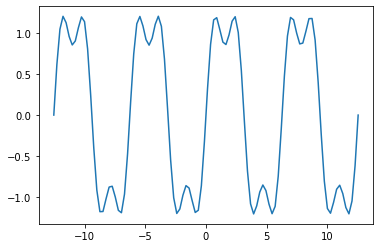

In [54]:
## TO DO: Plot the sum of the first 5 elements.
k=5
xx=np.linspace(-4*math.pi,4*math.pi,100)
yy=np.zeros(xx.size)
for i in range(xx.size):
    yy[i]=fourierSineSeries(k,calculateB_k(k),xx[i])
plt.plot(xx,yy)

Plot the sum of the first 10 elements in the fourier sine series for the square wave function.

In [57]:
## TO DO: Plot the sum of the first 10coefficient  elements.
def plotSumInFourierSineSeries(k):
    """
    Input: k
    Returns: plot of the sum of the first 10 elements in the fourier sine series for the square wave function
    """
    xx=np.linspace(-4*math.pi,4*math.pi,100)
    yy=np.zeros(xx.size)
    for i in range(xx.size):
        yy[i]=fourierSineSeries(k,calculateB_k(k),xx[i])
    plt.plot(xx,yy)

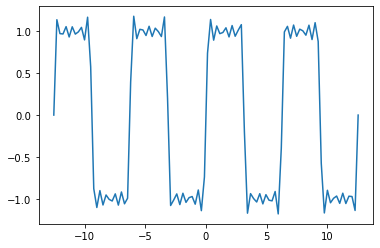

In [58]:
plotSumInFourierSineSeries(10)

Plot the sum of the first 100 elements in the fourier sine series for the square wave function.

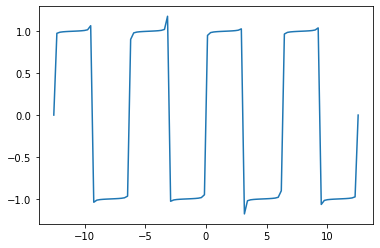

In [59]:
## TO DO: Plot the sum of the first 100 elements.
plotSumInFourierSineSeries(100)